In [13]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_dir = 'C:/Users/ASUS/OneDrive/Desktop/Dataset'

# Image parameters
img_height, img_width = 224, 224  # you can adjust these values
batch_size = 32

# Initialize the ImageDataGenerator with rescaling and augmentation (if needed)
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    validation_split=0.3,  # 30% split for validation+test
)

# Load training data (70% of data)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Initialize a separate ImageDataGenerator for validation/test split
validation_test_datagen = ImageDataGenerator(
    #rescale=1./255,
    validation_split=0.33  # 33% of the 30% (10% of total) for test, remaining for validation
)

# Load validation data (20% of total)
validation_generator = validation_test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load test data (10% of total)
test_generator = validation_test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Checking class indices to ensure correct mapping
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 689 images belonging to 5 classes.
Found 659 images belonging to 5 classes.
Found 322 images belonging to 5 classes.
{'Downdog': 0, 'Goddess': 1, 'Plank': 2, 'Tree': 3, 'warrior2': 4}
{'Downdog': 0, 'Goddess': 1, 'Plank': 2, 'Tree': 3, 'warrior2': 4}
{'Downdog': 0, 'Goddess': 1, 'Plank': 2, 'Tree': 3, 'warrior2': 4}


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for 5 poses
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
22/22 [==============================] - 45s 2s/step - loss: 2.1737 - accuracy: 0.3628 - val_loss: 0.7934 - val_accuracy: 0.6965
Epoch 2/10
22/22 [==============================] - 46s 2s/step - loss: 0.8271 - accuracy: 0.7025 - val_loss: 0.4956 - val_accuracy: 0.8483
Epoch 3/10
22/22 [==============================] - 47s 2s/step - loss: 0.5273 - accuracy: 0.8331 - val_loss: 0.2728 - val_accuracy: 0.9241
Epoch 4/10
22/22 [==============================] - 46s 2s/step - loss: 0.2642 - accuracy: 0.9086 - val_loss: 0.1215 - val_accuracy: 0.9727
Epoch 5/10
22/22 [==============================] - 47s 2s/step - loss: 0.1290 - accuracy: 0.9536 - val_loss: 0.0448 - val_accuracy: 0.9909
Epoch 6/10
22/22 [==============================] - 46s 2s/step - loss: 0.0643 - accuracy: 0.9811 - val_loss: 0.0164 - val_accuracy: 0.9939
Epoch 7/10
22/22 [==============================] - 47s 2s/step - loss: 0.0640 - accuracy: 0.9811 - val_loss: 0.0152 - val_accuracy: 0.9985
Epoch 8/10
22/22 [==

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

# Now, make predictions on the validation dataset and compare them with the actual labels
class_labels = ['Goddess', 'Plank', 'Tree', 'Warrior2', 'DownwardDog']

# Function to decode the one-hot encoded labels
def decode_labels(one_hot_labels):
    return [class_labels[np.argmax(label)] for label in one_hot_labels]

# Predicting poses on validation data and comparing with actual labels
validation_generator.reset()

11/11 [==============================] - 4s 390ms/step - loss: 0.2851 - accuracy: 0.9286
Test Accuracy: 0.9285714030265808


In [6]:
# Define class labels based on your training
class_labels = ['Goddess', 'Plank', 'Tree', 'Warrior2', 'Downdog']

# Function to decode the one-hot encoded labels
def decode_labels(one_hot_labels):
    return [class_labels[np.argmax(label)] for label in one_hot_labels]

# Get the ground truth labels from the validation generator
true_labels = decode_labels(validation_generator.classes)

# Predicting poses on validation data
predicted_labels = []
true_labels = []
for i in range(len(validation_generator)):
    images, labels = validation_generator[i]
    predictions = model.predict(images)
    predicted_labels.extend(decode_labels(predictions))
    true_labels.extend(decode_labels(labels))

# Compare predictions with actual labels
for i in range(len(true_labels)):
    print(f'Actual Pose: {true_labels[i]}, Predicted Pose: {predicted_labels[i]}')

# Optional: Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f'Validation Loss: {validation_loss}, Validation Accuracy: {validation_acc}')

1/1 [==============================] - 0s 325ms/step
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: DownwardDog, Predicted Pose: DownwardDog
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: DownwardDog, Predicted Pose: DownwardDog
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: DownwardDog, Predicted Pose: DownwardDog
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: DownwardDog, Predicted Pose: DownwardDog
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: Warrior2, Predicted 

21/21 [==============================] - 9s 416ms/step - loss: 6.5746e-04 - accuracy: 1.0000
Validation Loss: 0.0006574642611667514, Validation Accuracy: 1.0


In [8]:
# Or save the model in the TensorFlow SavedModel format
model.save('InnovateIT_YogaPose_classifier')

INFO:tensorflow:Assets written to: InnovateIT_YogaPose_classifier\assets


INFO:tensorflow:Assets written to: InnovateIT_YogaPose_classifier\assets


In [9]:
# Save the model to an HDF5 file
model.save('InnovateIT_YogaPose_classifier.h5')

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Define paths
dataset_dir = 'C:/Users/ASUS/OneDrive/Desktop/Dataset'

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Initialize the ImageDataGenerator with rescaling and augmentation (if needed)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,  # 30% split for validation+test
)

# Load training data (70% of data)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Initialize a separate ImageDataGenerator for validation
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.33  # 33% of the 30% (10% of total) for test, remaining for validation
)

# Load validation data (20% of total)
validation_generator = validation_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load test data (10% of total)
test_generator = validation_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define class labels based on your training
class_labels = ['Goddess', 'Plank', 'Tree', 'Warrior2', 'DowndDog']

# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for 5 poses
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Train the model with early stopping
model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Save the model to an HDF5 file
model.save('yoga_c.h5')

# Or save the model in the TensorFlow SavedModel format
#model.save('saved_model')

# Load the model from an HDF5 file or TensorFlow SavedModel format
# Uncomment the appropriate line based on your model format
model = load_model('yoga_c.h5')
# model = load_model('saved_model')

# Function to decode the one-hot encoded labels
def decode_labels(one_hot_labels):
    return [class_labels[np.argmax(label)] for label in one_hot_labels]

# Predicting poses on validation data
validation_steps = validation_generator.samples // validation_generator.batch_size
validation_generator.reset()
predicted_labels = []
true_labels = []

for _ in range(validation_steps):
    images, labels = validation_generator.next()
    predictions = model.predict(images)
    predicted_labels.extend(decode_labels(predictions))
    true_labels.extend(decode_labels(labels))

# Compare predictions with actual labels
for i in range(len(true_labels)):
    print(f'Actual Pose: {true_labels[i]}, Predicted Pose: {predicted_labels[i]}')

# Optionally evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


Found 689 images belonging to 5 classes.
Found 659 images belonging to 5 classes.
Found 322 images belonging to 5 classes.
Epoch 1/50
22/22 [==============================] - 37s 2s/step - loss: 2.2877 - accuracy: 0.3367 - val_loss: 0.9642 - val_accuracy: 0.7693
Epoch 2/50
22/22 [==============================] - 33s 2s/step - loss: 0.7589 - accuracy: 0.7373 - val_loss: 0.4682 - val_accuracy: 0.8998
Epoch 3/50
22/22 [==============================] - 34s 2s/step - loss: 0.4329 - accuracy: 0.8795 - val_loss: 0.1882 - val_accuracy: 0.9590
Epoch 4/50
22/22 [==============================] - 34s 2s/step - loss: 0.2011 - accuracy: 0.9332 - val_loss: 0.0828 - val_accuracy: 0.9879
Epoch 5/50
22/22 [==============================] - 34s 2s/step - loss: 0.0994 - accuracy: 0.9681 - val_loss: 0.0249 - val_accuracy: 0.9954
Epoch 6/50
22/22 [==============================] - 34s 2s/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/50
22/22 [===================

11/11 [==============================] - 4s 301ms/step - loss: 0.5226 - accuracy: 0.9224
Test Accuracy: 0.9223602414131165


In [22]:
# Predicting poses on validation data
validation_steps = validation_generator.samples // validation_generator.batch_size
validation_generator.reset()
predicted_labels = []
true_labels = []

for _ in range(validation_steps):
    images, labels = validation_generator.next()
    predictions = model.predict(images)
    predicted_labels.extend(decode_labels(predictions))
    true_labels.extend(decode_labels(labels))

# Compare predictions with actual labels
for i in range(len(true_labels)):
    print(f'Actual Pose: {true_labels[i]}, Predicted Pose: {predicted_labels[i]}')

# Optionally evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 0s 361ms/step
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: DowndDog, Predicted Pose: DowndDog
Actual Pose: DowndDog, Predicted Pose: DowndDog
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: DowndDog, Predicted Pose: DowndDog
Actual Pose: Goddess, Predicted Pose: Goddess
Actual Pose: Plank, Predicted Pose: Plank
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: DowndDog, Predicted Pose: DowndDog
Actual Pose: Warrior2, Predicted Pose: Warrior2
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: DowndDog, Predicted Pose: DowndDog
Actual Pose: Tree, Predicted Pose: Tree
Actual Pose: DowndDog, Predicted Pose: DowndDog
Actual Pose: Goddess, Predicted Pose: Godde

21/21 [==============================] - 7s 307ms/step - loss: 4.7064e-06 - accuracy: 1.0000
Test Accuracy: 1.0


1/1 [==============================] - 0s 313ms/step
Predicted Pose: Warrior2


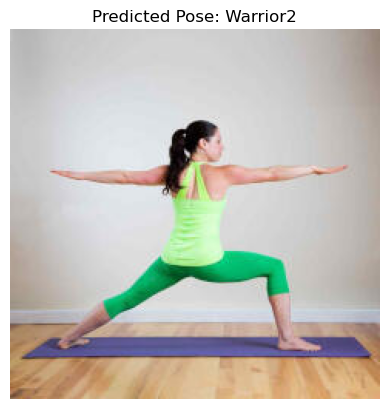

In [1]:
# testing the imported model with known images

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define class labels based on your training
class_labels = ['DownDod', 'Goddess', 'Plank', 'Tree', 'Warrior2']

# Load the model
model = load_model('yoga_c.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale
    return img_array

# Function to decode the predictions
def decode_predictions(pred):
    return class_labels[np.argmax(pred)]

# Path to the new image
new_image_path = 'C:/Users/ASUS/OneDrive/Desktop/input_images/12.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Make prediction
pred = model.predict(new_image)

# Decode the prediction
predicted_class = decode_predictions(pred[0])

print(f'Predicted Pose: {predicted_class}')

# Display the image
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title(f'Predicted Pose: {predicted_class}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 125ms/step
Predicted Pose: DownDod


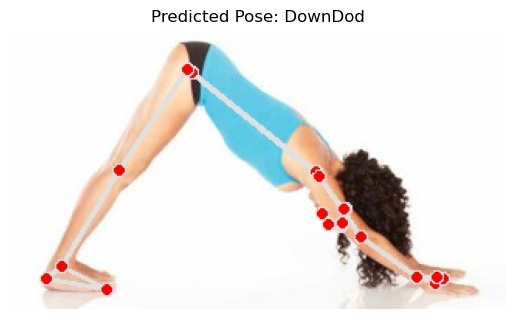

In [2]:
# testing the imported model with known images

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define class labels based on your training
class_labels = ['DownDod', 'Goddess', 'Plank', 'Tree', 'Warrior2']

# Load the model
model = load_model('yoga_c.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale
    return img_array

# Function to decode the predictions
def decode_predictions(pred):
    return class_labels[np.argmax(pred)]

# Path to the new image
new_image_path = 'C:/Users/ASUS/OneDrive/Desktop/input_images/5.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Make prediction
pred = model.predict(new_image)

# Decode the prediction
predicted_class = decode_predictions(pred[0])

print(f'Predicted Pose: {predicted_class}')

# Display the image
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title(f'Predicted Pose: {predicted_class}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 155ms/step
Predicted Pose: Goddess


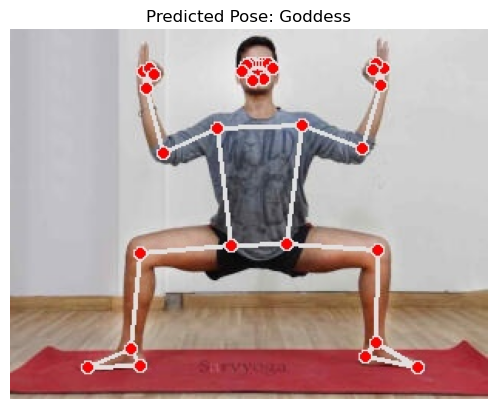

In [3]:
# testing the imported model with known images

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define class labels based on your training
class_labels = ['DownDod', 'Goddess', 'Plank', 'Tree', 'Warrior2']

# Load the model
model = load_model('yoga_c.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale
    return img_array

# Function to decode the predictions
def decode_predictions(pred):
    return class_labels[np.argmax(pred)]

# Path to the new image
new_image_path = 'C:/Users/ASUS/OneDrive/Desktop/input_images/7.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Make prediction
pred = model.predict(new_image)

# Decode the prediction
predicted_class = decode_predictions(pred[0])

print(f'Predicted Pose: {predicted_class}')

# Display the image
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title(f'Predicted Pose: {predicted_class}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 156ms/step
Predicted Pose: Tree


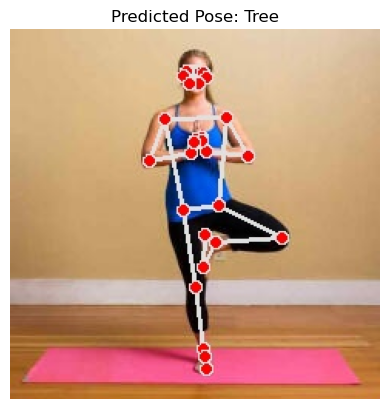

In [5]:
# testing the imported model with known images

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define class labels based on your training
class_labels = ['DownDod', 'Goddess', 'Plank', 'Tree', 'Warrior2']

# Load the model
model = load_model('yoga_c.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale
    return img_array

# Function to decode the predictions
def decode_predictions(pred):
    return class_labels[np.argmax(pred)]

# Path to the new image
new_image_path = 'C:/Users/ASUS/OneDrive/Desktop/input_images/9.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Make prediction
pred = model.predict(new_image)

# Decode the prediction
predicted_class = decode_predictions(pred[0])

print(f'Predicted Pose: {predicted_class}')

# Display the image
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title(f'Predicted Pose: {predicted_class}')
plt.axis('off')
plt.show()